* * *
<pre> NYU Paris            <i> Machine Learning - Spring 2023 </i></pre>
* * *


<h1 align="center"> Lab: Dimension Reduction </h1>

<pre align="left"> March 08th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Understand PCA deeply and see when it can be useful or not 
- Evaluate other dimension reduction methods

In [123]:
import numpy as np
from matplotlib import pyplot as plt

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

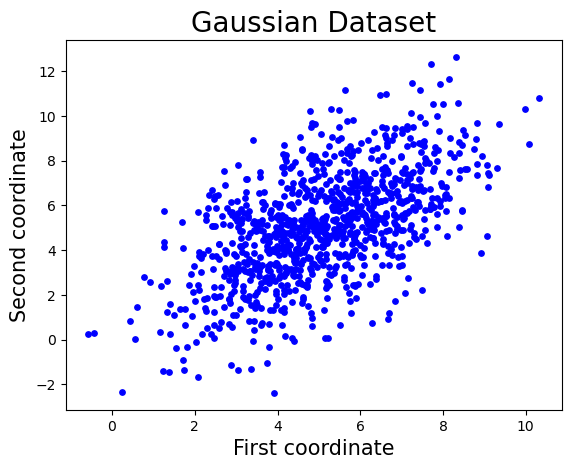

In [124]:
# Sample one dataset with (correlated) Gaussian distribution
np.random.seed(0)

# Size of data
n_samples = 1000
n_dim = 2

# Mean vector of the dataset
mean = 5 *  np.ones(n_dim)

# Sample covariance matrix from a Wishart distribution 
temp = np.random.randn(n_dim, n_dim)
cov = temp@temp.T

X = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 1: 

Implement your own PCA algorithm.

In [125]:
from sklearn.covariance import empirical_covariance
from numpy.linalg import eig

In [126]:
class MyPCA(object):
    
    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X):
        cov_matrix = np.cov(X.T)
        eigen_values, eigen_vectors = eig(cov_matrix)# to do
        
        #sort the eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1]# to do
 
        self.eigenvalues = eigen_values[sorted_index]# To do
    
        #similarly sort the eigenvectors 
        self.eigenvectors = eigen_vectors[:, sorted_index]# to do
        self.eigenvector_subset = self.eigenvectors[:, :self.n_components]# To do


    def transform(self, Z):
        return Z@self.eigenvector_subset

### Question 2

Apply PCA on the Gaussian dataset

In [127]:
pca = MyPCA(2)
pca.fit(X)
project_data = pca.transform(X)


### Question 3

Verify that your transformed data are decorrelated. What do you observe?

In [128]:
np.cov(project_data.T)

array([[7.18758390e+00, 3.12951755e-16],
       [3.12951755e-16, 1.61193680e+00]])

We observe that the entries cov[0, 1] = cov[1, 0] = 0 because our dimensions became decorrelated after the PCA. The main diagonal has non zero entries because they represent the variance for each of the dimensions. 

### Question 4

Visualize your transformed data after PCA.

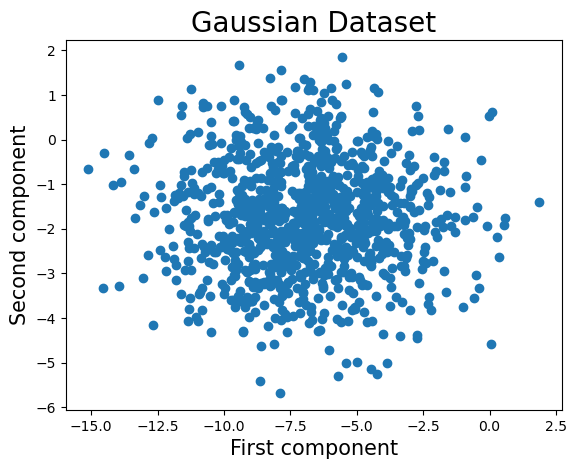

In [129]:
# to do
plt.scatter(project_data[:,0], project_data[:,1])
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 4bis

Visualize PCA components in your original orthornormed reference frame (Plot the data, and the components-axes).

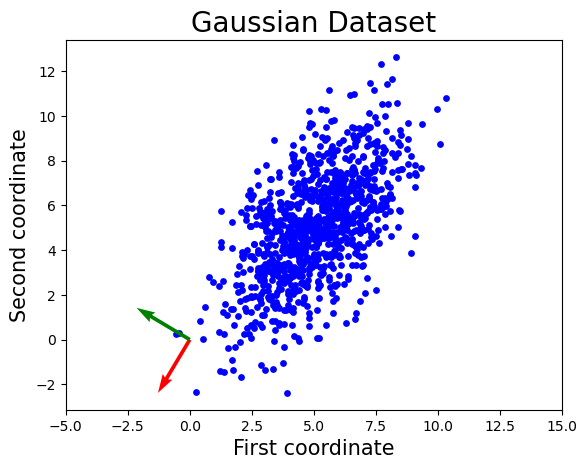

In [130]:
origin = np.array([[0, 0],[0, 0]])
V = pca.eigenvector_subset

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], scale=8)
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.xlim(-5, 15)
plt.show()

### Question 5

Compare your algorithm with the one in sklearn. You can check the covariance matrix of the transformed data. Is this the same than yours? What do you observe?

In [131]:
from sklearn.decomposition import PCA

In [132]:
skpca = PCA(2)
skpca.fit(X)
project_data_sk = skpca.transform(X)

print("Covariance matrix Scikit")
print(np.cov(project_data_sk.T))
print("\nCovariance matrix Implemented")
print(np.cov(project_data.T))


Covariance matrix Scikit
[[7.18758390e+00 2.13376197e-17]
 [2.13376197e-17 1.61193680e+00]]

Covariance matrix Implemented
[[7.18758390e+00 3.12951755e-16]
 [3.12951755e-16 1.61193680e+00]]


We see the matrices are the same. The variances in the main diagonal are exactly equal, and the entries [1, 0] and [0, 1] for both matrices are equal to 0.

### Bonus Question

Compare the computational time of both algorithms, what do you observe? Why?

In [133]:
import time

In [134]:
def generate_data(n_dim = 2):
    # Size of data
    n_samples = 50000

    # Mean vector of the dataset
    mean = 5 *  np.ones(n_dim)

    # Sample covariance matrix from a Wishart distribution 
    temp = np.random.randn(n_dim, n_dim)
    cov = temp@temp.T

    X = np.random.multivariate_normal(mean, cov, size=n_samples)
    return X

In [135]:
#We will compare the time it takes to intialize, fit, and predict.

mypca_total = 0
skpca_total = 0



#we sample the time 50...times... and compute the average time taken
for dims in range(2, 100, 10):
    X_test = generate_data(dims)
    for _ in range(50):
        start_mypca = time.time()

        mypca_test = MyPCA(2)
        mypca_test.fit(X_test)
        mypca_test.transform(X_test)

        end_mypca = time.time()


        start_skpca = time.time()

        skpca_test = PCA(2)
        skpca_test.fit(X_test)
        skpca_test.transform(X_test)

        end_skpca = time.time()

        mypca_total += end_mypca - start_mypca
        skpca_total += end_skpca - start_skpca

    print(f"Dimsensions = {dims}")
    print(f"MyPCA = {mypca_total/50}")
    print(f"SkPCA = {skpca_total/50}")


Dimsensions = 2
MyPCA = 0.0013964223861694337
SkPCA = 0.002619185447692871
Dimsensions = 12
MyPCA = 0.004161286354064942
SkPCA = 0.04087087631225586
Dimsensions = 22
MyPCA = 0.008421273231506347
SkPCA = 0.10133270263671874
Dimsensions = 32
MyPCA = 0.014398307800292968
SkPCA = 0.17346333026885985
Dimsensions = 42
MyPCA = 0.022729034423828124
SkPCA = 0.2650464916229248
Dimsensions = 52
MyPCA = 0.03253434658050537
SkPCA = 0.35596403121948245
Dimsensions = 62
MyPCA = 0.04351293087005615
SkPCA = 0.4473066186904907
Dimsensions = 72
MyPCA = 0.058657746315002444
SkPCA = 0.5524780225753784
Dimsensions = 82
MyPCA = 0.07686554431915284
SkPCA = 0.66511483669281
Dimsensions = 92
MyPCA = 0.0980504035949707
SkPCA = 0.7831248807907104


We observe that MyPCA is consistently faster than the sklearn implemented PCA. Our PCA is very simplistic. Looking at the implementation of sklearn's PCA, there are lots of error checking and keeps track of many more variables. This might explain the slower times. 

### Question 6

Let's apply the PCA on a (easy) classification real-world dataset. Apply PCA with 2 components and visualize the dataset with different colors for each class.

In [136]:
from sklearn import datasets

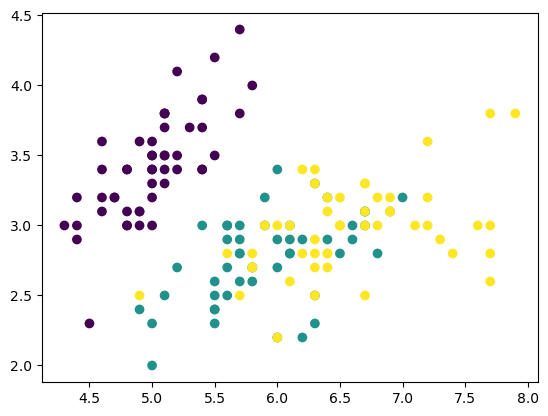

In [137]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

In [138]:
X_iris.shape

(150, 4)

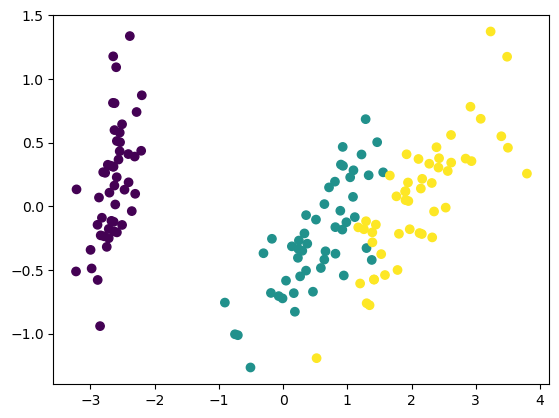

In [139]:
iris_pca = PCA(2)
iris_pca.fit(X_iris)
X_iris_pca = iris_pca.transform(X_iris)


plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris)
plt.show()

### Question 7

Use a KNN algorithm and perform it on the dataset. Use different combinations of parameters using the GridSearchCV function.

In [140]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [141]:
knn_pipe = Pipeline([ ( 'classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [2, 3, 5, 8, 10, 15, 20, 30],
         'classifier__metric': ['cityblock','minkowski'],
         'classifier__algorithm': ['auto','ball_tree', 'kd_tree', 'brute']}

clf = GridSearchCV(knn_pipe, params, cv=5, scoring='accuracy')

#we do not fear training and testing on the same data because the algorithm is not learning anything. 
#and the grid search is perofrming the folding crossvalidation already.
clf.fit(X_iris, y_iris)

print(clf.best_estimator_)
print(classification_report(y_iris, clf.best_estimator_.predict(X_iris)))

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=10))])
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.98      0.97        50
           2       0.98      0.96      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



### Question 8

Use a PCA first and then apply again the classification algorithm. Observe the best score, is the PCA improve the results? Which explanation can you give?

In [142]:
#we use the same parameters that gave us the best accuracy above

clf = KNN(algorithm='brute', n_neighbors=10)
clf.fit(X_iris_pca, y_iris)

print(classification_report(y_iris, clf.predict(X_iris_pca)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



There is a slight difference between the scores because the PCA loses some information that could have been useful for the KNN algorithm. However, if we use the pipeline, we get an accuracy of 0.98 for the best stimator with different parameters (see below). Still the dataset is very small and simple, so the PCA does not help in the classification because the data is already sparsed enough.

In [143]:
knn_pipe = Pipeline([ ( 'classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [2, 3, 5, 8, 10, 15, 20, 30],
         'classifier__metric': ['cityblock','minkowski'],
         'classifier__algorithm': ['auto','ball_tree', 'kd_tree', 'brute']}

clf = GridSearchCV(knn_pipe, params, cv=5, scoring='accuracy')

#passing the PCA data
clf.fit(X_iris_pca, y_iris)

print(classification_report(y_iris, clf.best_estimator_.predict(X_iris_pca)))
print(clf.best_estimator_)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

Pipeline(steps=[('classifier', KNeighborsClassifier(metric='cityblock'))])


### Question 9

How features influence the first components (in term of variance)? You can answer this question by inspecting the weights in the first component. 

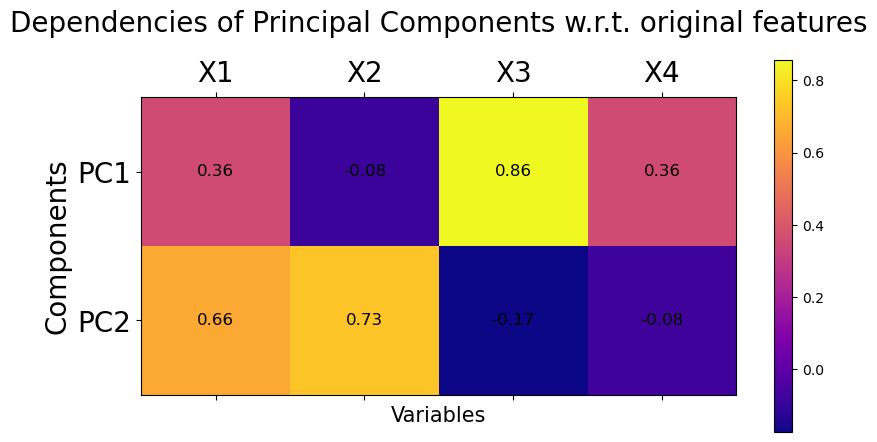

In [144]:
plt.matshow(iris_pca.components_, cmap='plasma')
plt.ylabel('Components', size=20)
plt.xlabel('Variables', size=15)
for i in range(4):
    for j in range(2):
        plt.text(i, j, "%0.2f" % iris_pca.components_[j, i], size=12, color='black', ha="center", va="center")
plt.colorbar()
xlabels = ['X1', 'X2', 'X3', 'X4']
plt.xticks(range(4), xlabels, size=20)
ylabels = ['PC1', 'PC2']
plt.yticks(range(2), ylabels, size=20)
plt.title('Dependencies of Principal Components w.r.t. original features', size=20, pad=20)
plt.show()

We see that the dimension 3 of the orginal dataset influences the first component the most (X3 has a weight of .86 in PC1). Dimension 1 and 4 also contribute a significant variance (with a weight of 0.36 each). X2 barely has importance in the first dimension. 

### Bonus Question

Create a pipeline with KNN, classification trees, RandomForest and SVM. Perform the Question 7/8 for these 4 classifiers. What do you observe?

In [145]:
from sklearn.model_selection import train_test_split
np.random.seed(10)

#because we are going to use several classifiers, we need to perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.8)

In [146]:
#from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import LinearSVC as SVM
from sklearn.base import BaseEstimator

#we create a wrapper class because every funciton must have a fit and a predict function to work in the pipeline. 
#This class provides the functions
class ClfSwitcher(BaseEstimator):
    def __init__(self, estimator=SVM()):
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)
    
classifier_pipe = Pipeline([('base', ClfSwitcher())])

params = [ 
            {
                'base__estimator': [KNN()],
                'base__estimator__n_neighbors': [2, 3, 5, 8, 10, 15, 20, 30],
                'base__estimator__metric': ['cityblock','minkowski'],
                'base__estimator__algorithm': ['auto','ball_tree', 'kd_tree', 'brute']
            },
            {
                'base__estimator': [DTC()],
                'base__estimator__criterion': ['gini', 'entropy'],
                'base__estimator__max_depth': [2, 5, 8, 10],
                'base__estimator__min_samples_leaf': [1, 2, 3]
            },
           {
                'base__estimator': [RFC()],
                'base__estimator__n_estimators': [20, 50, 100, 150],
                'base__estimator__criterion': ['gini','entropy'],
                'base__estimator__max_depth': [2, 5, 8, 10],
                'base__estimator__min_samples_leaf': [1, 2, 3]
            },
            {
                'base__estimator': [SVM(max_iter=10000)],
                'base__estimator__C': [0.5, 1.0, 2.0],
                'base__estimator__penalty': ['l2']
            }
]

grid_classifiers = GridSearchCV(classifier_pipe, params, cv=5, scoring='accuracy')
grid_classifiers.fit(X_train, y_train)

print(accuracy_score(y_test, grid_classifiers.best_estimator_.predict(X_test)))
print(grid_classifiers.best_estimator_)

0.9666666666666667
Pipeline(steps=[('base',
                 ClfSwitcher(estimator=KNeighborsClassifier(n_neighbors=3)))])


KNN remains the best classifier for the small dataset wihtout PCA. Of course, we did not perform lots of hyperparameter tuning.

In [147]:
classifier_pipe_pca = Pipeline([('pca', PCA(2)), ('base', ClfSwitcher())])
params = [ 
            {
                'base__estimator': [KNN()],
                'base__estimator__n_neighbors': [2, 3, 5, 8, 10, 15, 20, 30],
                'base__estimator__metric': ['cityblock','minkowski'],
                'base__estimator__algorithm': ['auto','ball_tree', 'kd_tree', 'brute']
            },
            {
                'base__estimator': [DTC()],
                'base__estimator__criterion': ['gini', 'entropy'],
                'base__estimator__max_depth': [2, 5, 8, 10],
                'base__estimator__min_samples_leaf': [1, 2, 3]
            },
           {
                'base__estimator': [RFC()],
                'base__estimator__n_estimators': [20, 50, 100, 150],
                'base__estimator__criterion': ['gini','entropy'],
                'base__estimator__max_depth': [2, 5, 8, 10],
                'base__estimator__min_samples_leaf': [1, 2, 3]
            },
            {
                'base__estimator': [SVM(max_iter=10000)],
                'base__estimator__C': [0.5, 1.0, 2.0],
                'base__estimator__penalty': ['l2']
            }
]

grid_classifiers_pca = GridSearchCV(classifier_pipe_pca, params, cv=5, scoring='accuracy')
grid_classifiers_pca.fit(X_train, y_train)

print(accuracy_score(y_test, grid_classifiers_pca.best_estimator_.predict(X_test)))
print(grid_classifiers_pca.best_estimator_)

0.9666666666666667
Pipeline(steps=[('pca', PCA(n_components=2)),
                ('base',
                 ClfSwitcher(estimator=KNeighborsClassifier(metric='cityblock')))])


We achieve the same accuracy with different parameters. 

Given the small dataset, it is entirely possible that we just got lucky. Indeed, changing the random seed above (to 0 for example), we realize that multiple classifiers, such as KNN with 30 neighbors, decision tress with depth 5, etc perform with an accuracy of 1.0 both with and wihtout PCA. This is product of the inherent randomness of the traintest split and how small our training and test data is. We would need a greater dataset or perform more cross validation to better asses the accuracy of each model.

### Question 10

Time to apply PCA on a high dimensional dataset.

In [148]:
from sklearn.datasets import load_digits
digits = load_digits()
X_d = digits.data
y_d = digits.target

print(X_d.shape)

(1797, 64)


### Question 11

Now, you will have to reduce the dimension. The main question is: how to choose the number of components? 


Perform a PCA with a high number of components and inspect the explained variance. Which number of components do you suggest?

In [149]:
large_digits_pca = PCA(64)
large_digits_pca.fit(X_d)

# print(large_digits_pca.explained_variance_ratio_)

PCA(n_components=64)

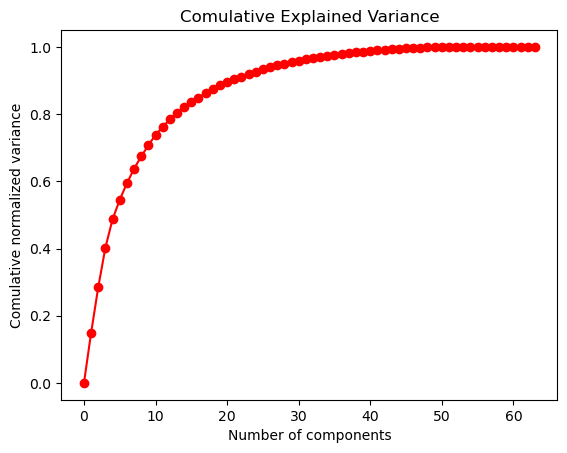

In [150]:
variances = [large_digits_pca.explained_variance_ratio_[:i].sum() for i in range(len(large_digits_pca.explained_variance_ratio_))]

plt.plot(variances, marker='o', c='r')
plt.title('Comulative Explained Variance')
plt.ylabel('Comulative normalized variance')
plt.xlabel('Number of components')
plt.show()

In [151]:
print(variances[28])
print(variances[14])
print(variances[6])

0.9499011267982514
0.8206343254758509
0.5941326298981379


We performed PCA with full dimensionality to see how much each dimension contributes in the total explained variance ratio. 

Our answer to this question will depend on what is our goal. If we want to improve the speed of computations, we see that 14 dimensions already preserves 82% of the variance, so this is a good choice. If we want to further reduce this, we would pick 6 to explain around 59% of the variance.

If we want to preserve as much of the data as possible, we would use 25 to explain 95% of the data.

### Question 12

Run PCA on the handwritten digits data reducing its dimension from 64 to 2. Visualise digits in dimension two. Is dimension two seems enough to represent keep information of data?

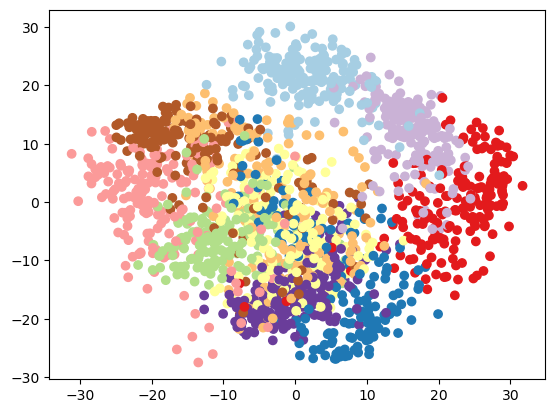

In [152]:
from matplotlib import cm

small_digits_pca = PCA(2)
small_digits_pca.fit(X_d, y_d)
vis = small_digits_pca.transform(X_d)
colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

Definitely not enough. We can see that the blobs of one color are not sufficiently distinguishable from each other. This is within our predictions. From our previous plot, we can see 2 dimension PCA explains less than 30% of the variance.

### Question 13

Perform a KNN algorithm on the raw data and on the projected data. What do you observe in terms of accuracy?

In [153]:
knn_pipe_digits = Pipeline([('classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [3, 5, 8, 10, 15],
         'classifier__metric': ['cityblock','minkowski']}

kpd = GridSearchCV(knn_pipe_digits, params, cv=5, scoring='accuracy')
kpd.fit(X_d, y_d)

print(kpd.best_estimator_)
accuracy_score(y_d, kpd.best_estimator_.predict(X_d))

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=3))])


0.993322203672788

In [154]:
knn_pipe_digits = Pipeline([ ( 'classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [3, 5, 8, 10, 15],
         'classifier__metric': ['cityblock','minkowski']}

kpd = GridSearchCV(knn_pipe_digits, params, cv=5, scoring='accuracy')
kpd.fit(vis, y_d)

print(kpd.best_estimator_)
accuracy_score(y_d, kpd.best_estimator_.predict(vis))

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=15))])


0.6933778519755147

The accuracy is very bad because our transformed data does not contain enough distingushable information, as we saw above. Visually, we can observe that points of one color are surrounded by points of different colors, so the KNN classification is bounded to fail. 

### Bonus Question

Apply other reduction dimension methods such as Kernel PCA (choose one kernel), Independant Component Analysis (ICA) and t-SNE. Visualize their projection in dimension two.

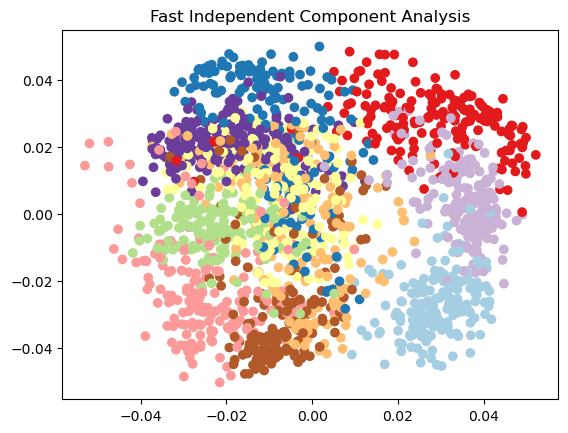

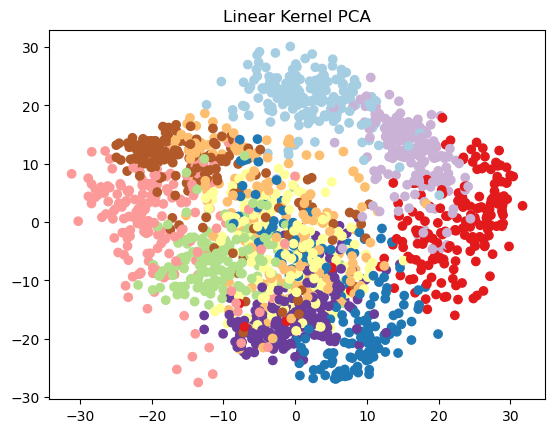

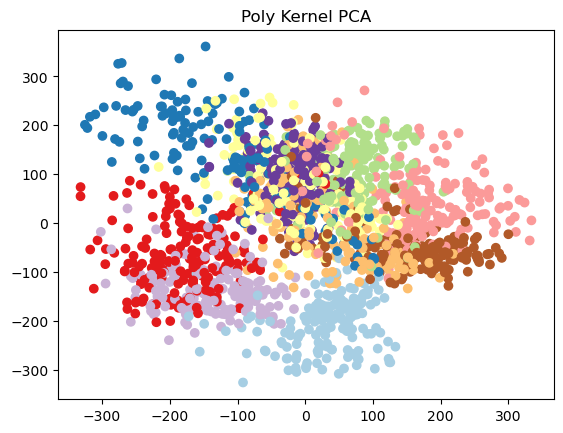

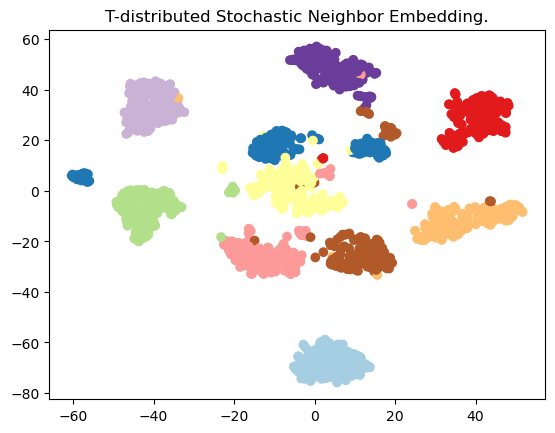

In [81]:
from sklearn.decomposition import FastICA, PCA, KernelPCA
from sklearn.manifold import TSNE

colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors
colors_all = colors[digits.target]

def plot_digits(data, title=None):
    plt.scatter(data[:, 0], data[:, 1], c=colors_all)
    plt.title(title)
    plt.show()

plot_digits(FastICA(2).fit_transform(X_d), "Fast Independent Component Analysis")
plot_digits(KernelPCA(2, kernel='linear').fit_transform(X_d), "Linear Kernel PCA")
plot_digits(KernelPCA(2, kernel='poly').fit_transform(X_d), "Poly Kernel PCA")
plot_digits(TSNE(2).fit_transform(X_d), "T-distributed Stochastic Neighbor Embedding.")

It seem that TSNE is well suited for KNN even for small dimensions. Let's check its accuracy.

In [82]:
#I have an annoying error that prevents me from including the TSNE in the pipeline, so we check dimensions 1 and 2

knn_pipe_digits = Pipeline([( 'classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [3, 5, 8, 10, 15],
         'classifier__metric': ['cityblock','minkowski']}

kpd = GridSearchCV(knn_pipe_digits, params, cv=5, scoring='accuracy')

tsne_data = TSNE(1).fit_transform(X_d)
kpd.fit(tsne_data, y_d)

print(kpd.best_estimator_)
accuracy_score(y_d, kpd.best_estimator_.predict(tsne_data))

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(metric='cityblock', n_neighbors=3))])


0.9877573734001113

In [83]:
knn_pipe_digits = Pipeline([( 'classifier', KNN() ) ] )

params = {'classifier__n_neighbors': [3, 5, 8, 10, 15],
         'classifier__metric': ['cityblock','minkowski']}

kpd = GridSearchCV(knn_pipe_digits, params, cv=5, scoring='accuracy')

tsne_data = TSNE(2).fit_transform(X_d)
kpd.fit(tsne_data, y_d)

print(kpd.best_estimator_)
accuracy_score(y_d, kpd.best_estimator_.predict(tsne_data))

Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=3))])


0.991652754590985

We have an extremely good accuracy for the low dimensionality
